# Mushroom Classification

## Import Libraries and Load Data

In [71]:
# These installs are required each time you switch from/to CPU/GPU
!pip install scikeras
!pip install np_utils

In [72]:
# Dependencies and Libraries

# Tensorflow
import tensorflow as tf

# Other machine learning modules
from scikeras.wrappers import KerasClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.svm import SVC

# Commonly used modules
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix

In [73]:
# Dataset
url = "mushrooms.csv"

In [74]:
# Read in data and examine it
dataset = pd.read_csv(url)
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Examine Data

In [75]:
# Rows and columns
dataset.shape

(8124, 23)

In [76]:
# Datatypes and names of columns
dataset.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [77]:
# Check for Null values
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [78]:
# Look at data distribution
for x in dataset.columns:
  print(f"Column: {x}")
  print("-"*20)
  print(dataset[x].value_counts())
  print("")

Column: class
--------------------
class
e    4208
p    3916
Name: count, dtype: int64

Column: cap-shape
--------------------
cap-shape
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: count, dtype: int64

Column: cap-surface
--------------------
cap-surface
y    3244
s    2556
f    2320
g       4
Name: count, dtype: int64

Column: cap-color
--------------------
cap-color
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: count, dtype: int64

Column: bruises
--------------------
bruises
f    4748
t    3376
Name: count, dtype: int64

Column: odor
--------------------
odor
n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: count, dtype: int64

Column: gill-attachment
--------------------
gill-attachment
f    7914
a     210
Name: count, dtype: int64

Column: gill-spacing
--------------------
gill-spacing
c    6812
w    1312
Name: count, dtype: int64

Column: gill-size
----

Veil-type has the same value for every row in the data. We will drop it. There is no need to scale the data because it is all categorical.

In [79]:
# Drop veil-type and verify
dataset = dataset.drop(columns = "veil-type")
dataset.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [80]:
# Convert to numeric
for x in dataset.columns:
  dataset[x], _ = pd.factorize(dataset[x])

In [81]:
# Check that it worked
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,0,1,0,0,1,0,...,0,0,0,0,0,0,0,1,1,1
2,1,1,0,2,0,2,0,0,1,1,...,0,0,0,0,0,0,0,1,1,2
3,0,0,1,2,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,3,1,3,0,1,1,0,...,0,0,0,0,0,0,1,1,2,1


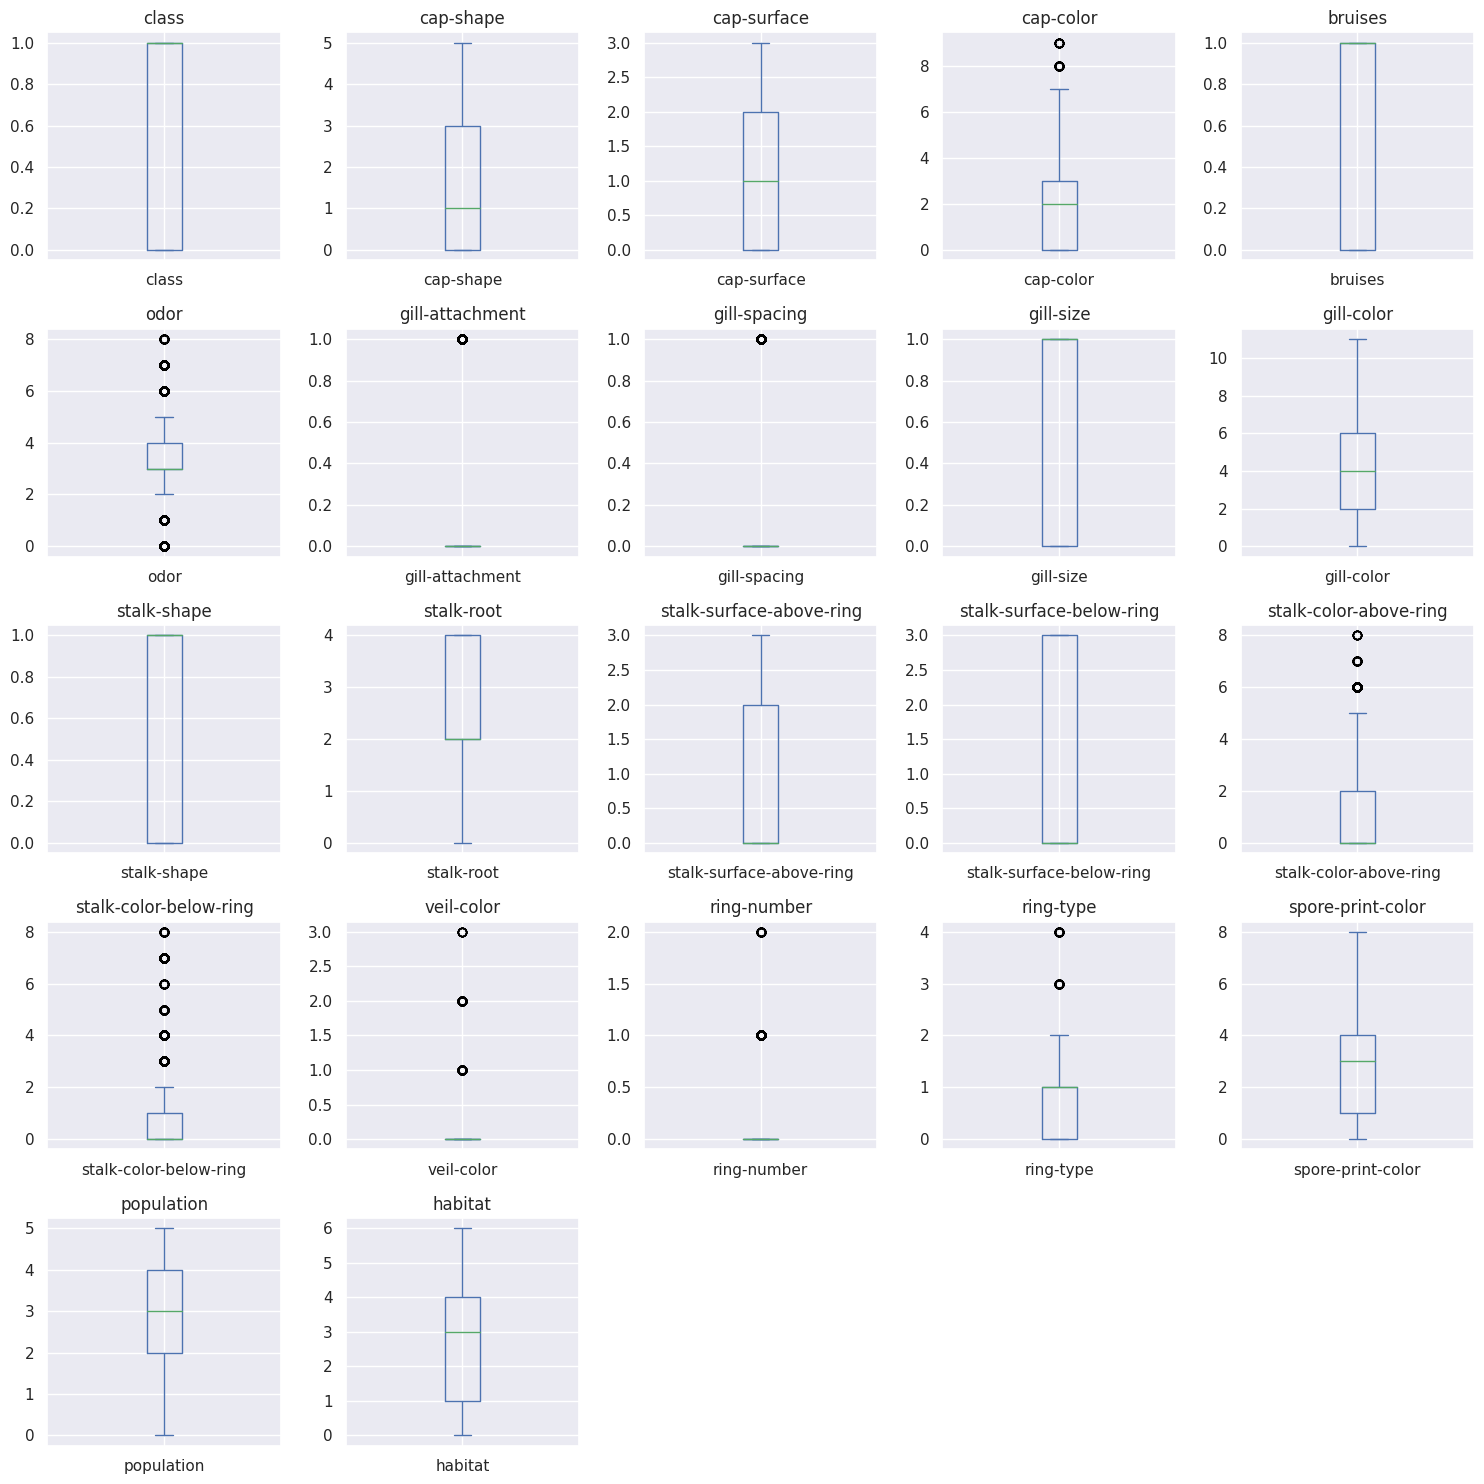

In [82]:
# Create boxplots
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes so we can iterate over them
axes = axes.flatten()

# Plot each column in a separate subplot
for i, col in enumerate(dataset.columns):
    dataset[col].plot(kind='box', ax=axes[i])
    axes[i].set_title(col)
    axes[i].grid(True)

# Remove any unused subplots
for j in range(len(dataset.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
#plt.savefig("images/boxplots.png")
plt.show()

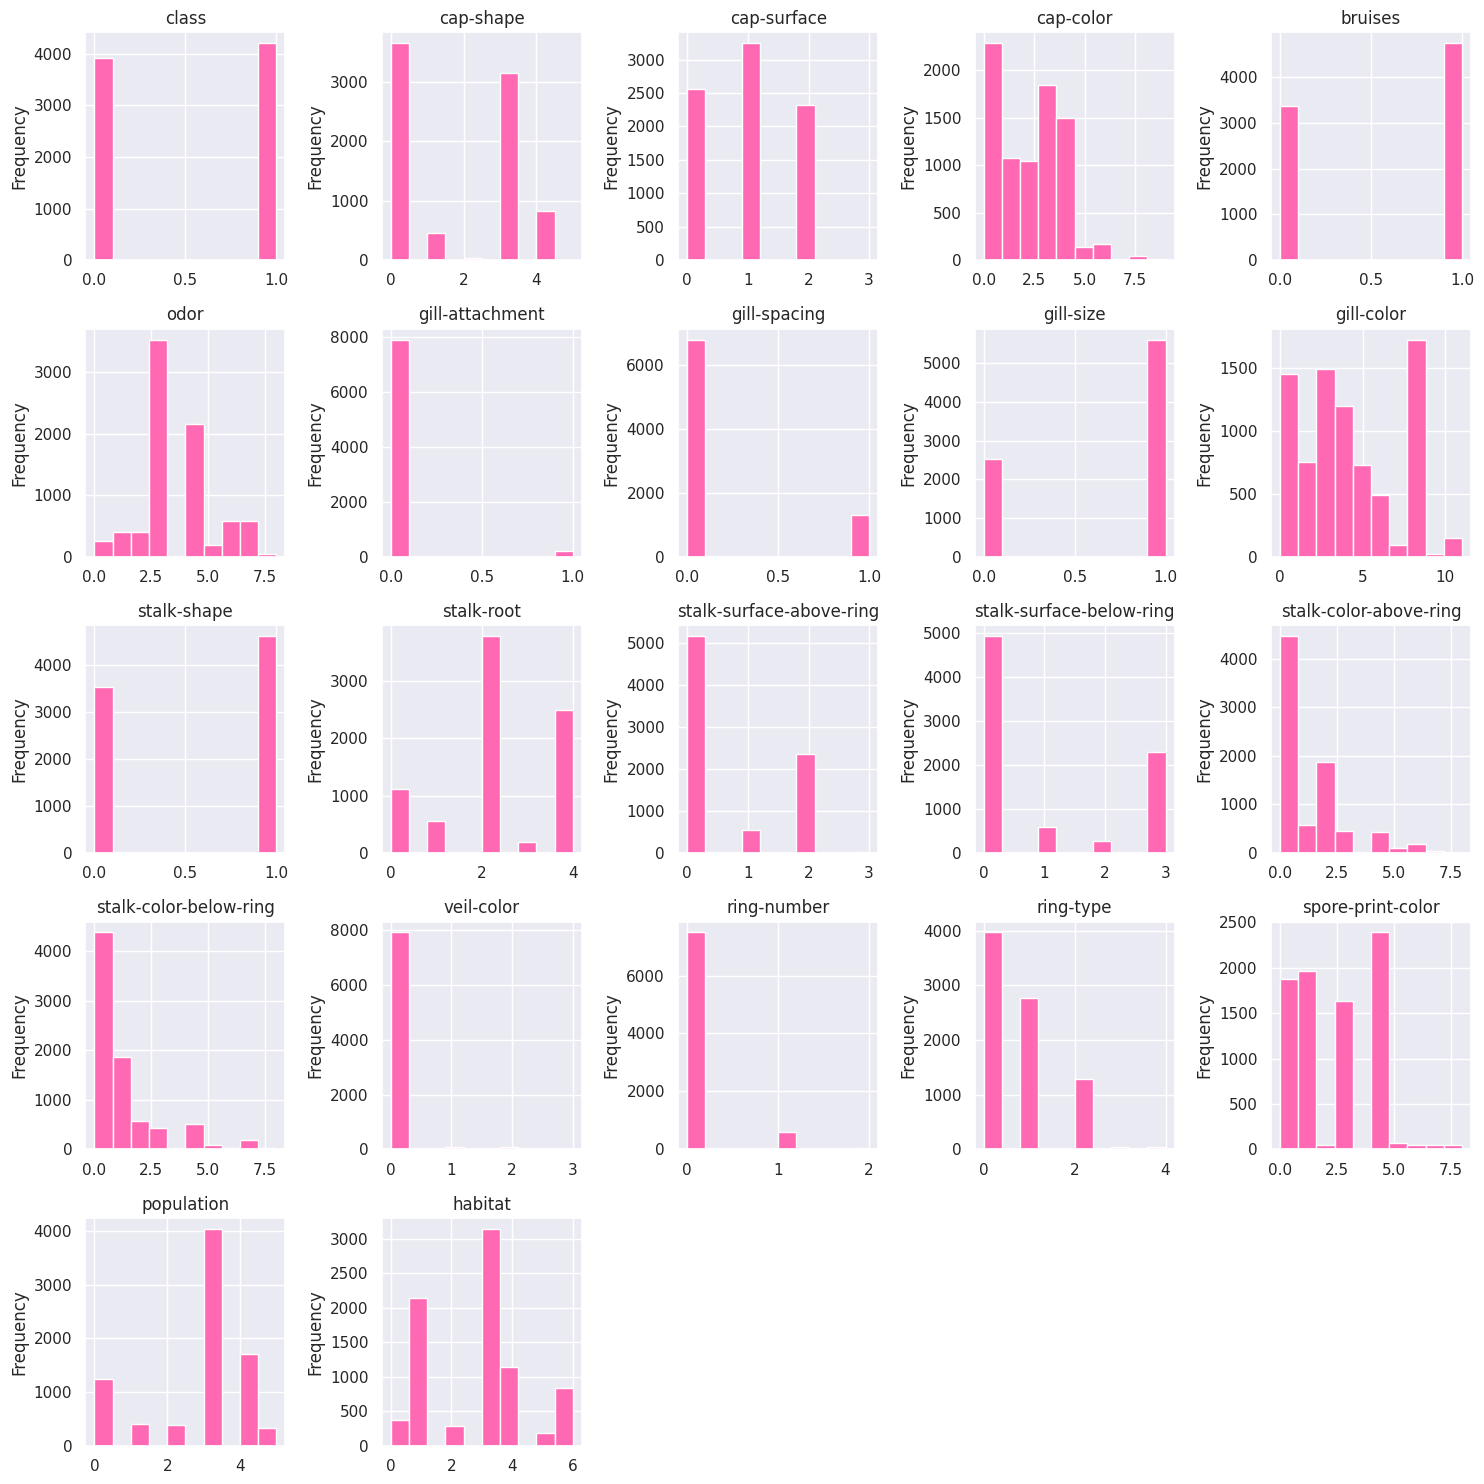

In [83]:
# Create histograms
fig, axes = plt.subplots(5, 5, figsize=(15, 15))

# Flatten the axes so we can iterate over them
axes = axes.flatten()

# Plot each column in a separate subplot with color #FF69B4
for i, col in enumerate(dataset.columns):
    dataset[col].plot(kind='hist', ax=axes[i], color='#FF69B4')
    axes[i].set_title(col)
    axes[i].grid(True)

# Remove any unused subplots
for j in range(len(dataset.columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
#plt.savefig("images/histograms.png")
plt.show()

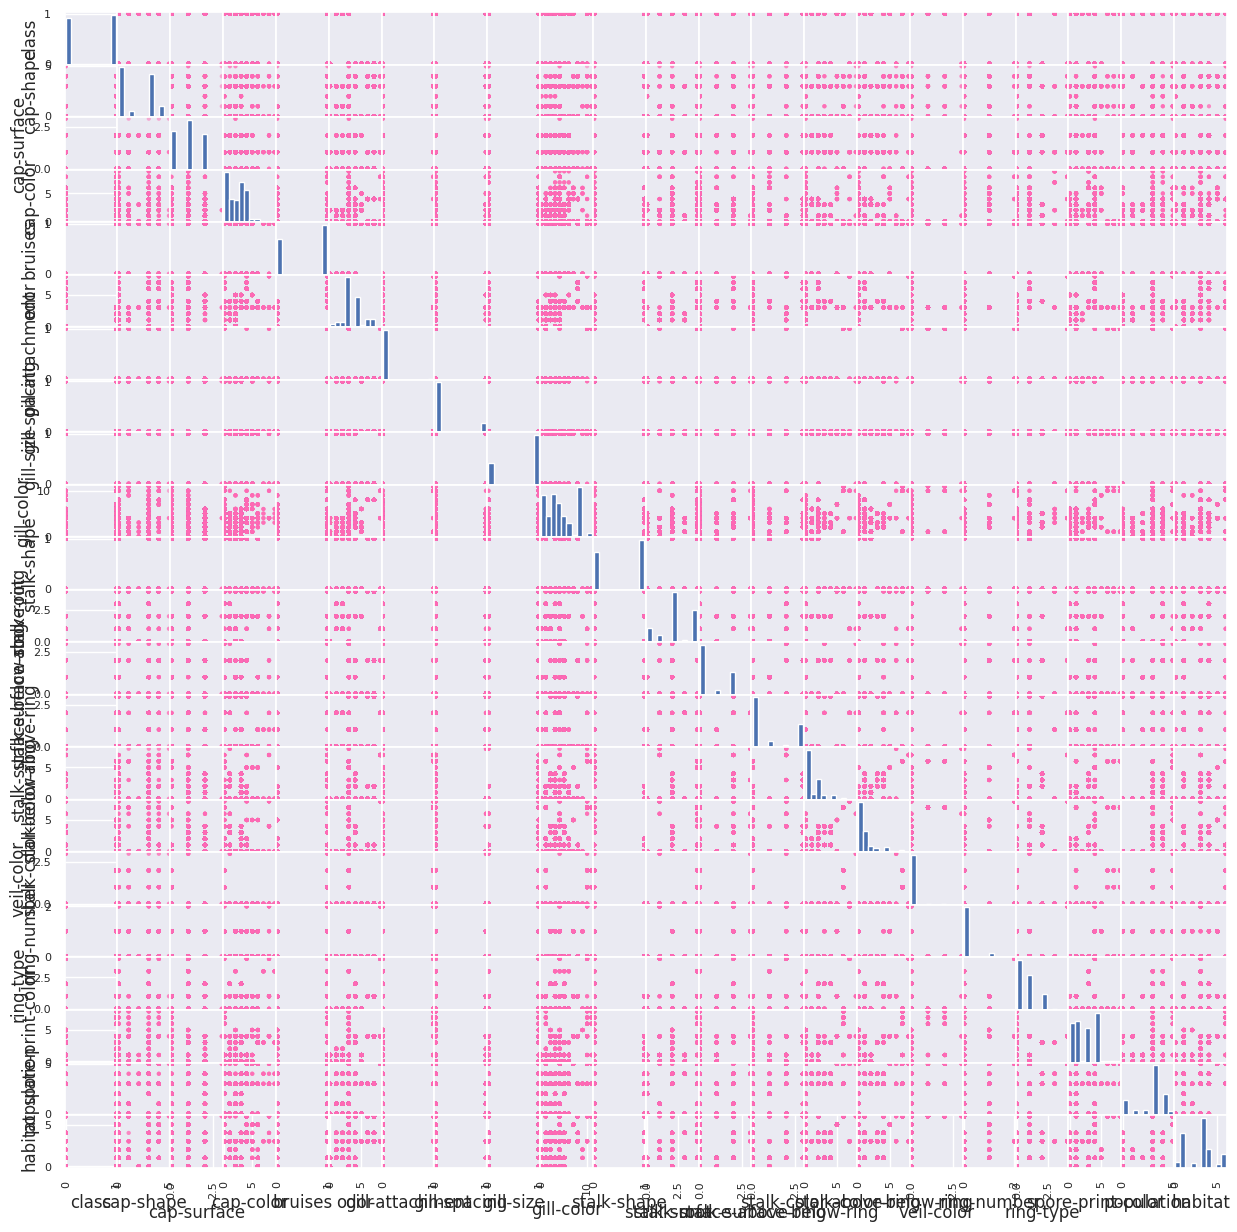

In [84]:
# Create scatter matrix
scatter_matrix(dataset, color="#FF69B4", figsize=(15, 15))

# Save the figure to a .png file
#plt.savefig("images/scatter_matrix_plot.png")

# Show the plot
plt.show()

In [85]:
y = dataset['class']
X = dataset.drop(columns = 'class')

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [87]:
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, random_state=1)

In [88]:
# Convert to numpy array
X_train = X_train.to_numpy()
X_validate = X_validate.to_numpy()
X_test = X_test.to_numpy()

y_train = y_train.to_numpy()
y_validate = y_validate.to_numpy()
y_test = y_test.to_numpy()

print(f"Shape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of X_validate: {X_validate.shape}")

print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")
print(f"Shape of y_validate: {y_validate.shape}")


Shape of X_train: (4569, 21)
Shape of X_test: (2031, 21)
Shape of X_validate: (1524, 21)
Shape of y_train: (4569,)
Shape of y_test: (2031,)
Shape of y_validate: (1524,)


# Random Forrest Classifier

## Train Model

In [89]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [90]:
y_pred = clf.predict(X_test)

In [91]:
score = clf.score(X_test, y_test)
score

1.0

In [92]:
confusion_matrix(y_test, y_pred)

array([[1011,    0],
       [   0, 1020]])

In [93]:
report = classification_report(y_test, y_pred)

print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



## Hyper-Tune Model

## Test Model

## Evaluate Model

# Support Vector Machine

In [94]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns; sns.set()
from ipywidgets import interact, fixed

from sklearn.svm import SVC # "Support vector classifier"

from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import learning_curve

In [95]:
#loading the data from mushrooms.csv


# Define the model
clf = SVC(kernel='rbf', C=2)



In [96]:
# Execute random grid search on training data
clf.fit(X_train, y_train)

SVC(C=2)

In [97]:
y_pred = clf.predict(X_test)
y_pred[0:5]

array([1, 0, 0, 0, 1])

In [98]:
score = clf.score(X_test, y_test)
score

0.9975381585425899

Plotting decision boundary and support vectors:

In [101]:
confusion_matrix(y_test, y_pred)

array([[1006,    5],
       [   0, 1020]])

In [103]:
from sklearn.model_selection import learning_curve

train_size_abs, train_scores, test_scores = learning_curve(
     clf, X_train, y_train)

for train_size, cv_train_scores, cv_test_scores in zip(
     train_size_abs, train_scores, test_scores):

  print(f"{train_size} samples were used to train the model")
  print(f"The average train accuracy is {cv_train_scores.mean():.2f}")
  print(f"The average test accuracy is {cv_test_scores.mean():.2f}")

365 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 0.99
1187 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 1.00
2010 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 1.00
2832 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 1.00
3655 samples were used to train the model
The average train accuracy is 1.00
The average test accuracy is 1.00


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/backend/fork_exec.py:38: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid = os.fork()


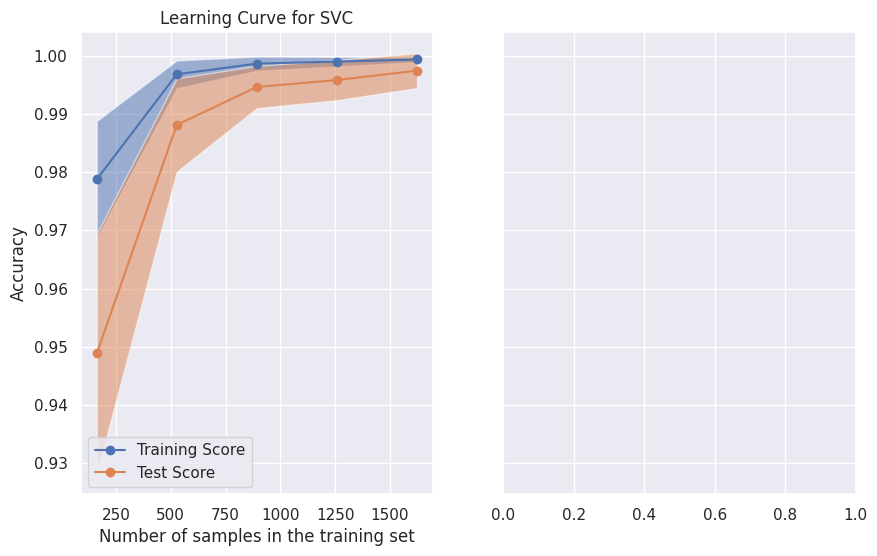

In [106]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import LearningCurveDisplay, ShuffleSplit

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X_test,
    "y": y_test,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "cv": ShuffleSplit(n_splits=50, test_size=0.2, random_state=0),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, estimator in enumerate([clf]):
    LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {estimator.__class__.__name__}")

In [114]:
from sklearn import metrics
#score=y_p
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=2)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_ranking.py:1146: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


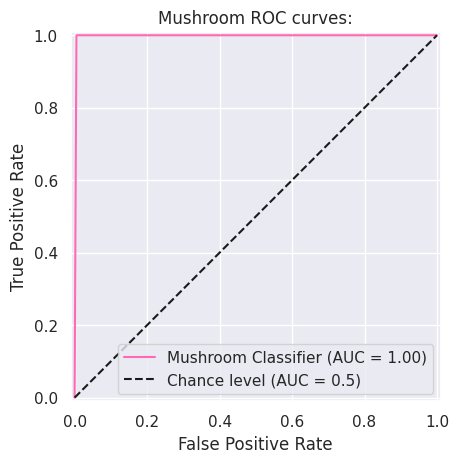

In [120]:
import matplotlib.pyplot as plt

from sklearn.metrics import RocCurveDisplay

display = RocCurveDisplay.from_predictions(
    y_test,
    y_pred,
    name=f"Mushroom Classifier",
    color="hotpink",
    plot_chance_level=True,
)
_ = display.ax_.set(
    xlabel="False Positive Rate",
    ylabel="True Positive Rate",
    title="Mushroom ROC curves:",
)

plt.savefig("MushroomROC.png")

In [102]:
report = classification_report(y_test, y_pred)

print("Classification Report: ")
print(report)

Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1020

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# FNN

In [ ]:
# define the model
def tuned_model(neurons_1=50, dropout=0.0, layers=2, act_h='relu', act_o='softmax'):
  # create model
  model = tf.keras.Sequential()
  model.add(tf.keras.layers.Input(shape=(21,)))
  # model.add(tf.keras.layers.Dense(units=21, activation=act_h, kernel_initializer='normal'))
  model.add(tf.keras.layers.Dense(units=neurons_1, activation=act_h, kernel_initializer='normal'))
  model.add(tf.keras.layers.Dropout(rate=dropout))
  for layer in range(layers - 1):
      model.add(tf.keras.layers.Dense(units=neurons_1, activation=act_h, kernel_initializer='normal'))
      if layers > 2:
        model.add(tf.keras.layers.Dropout(rate=dropout))
  model.add(tf.keras.layers.Dense(units=1,activation=act_o))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])
  return model

In [ ]:
# Create an object using the KerasClassifier wrapper
classifier = KerasClassifier(build_fn=tuned_model, epochs=50, batch_size=200, verbose=0)

In [ ]:
# Define hyper-parameter dictionary for tuning
param_grid={
    'model__neurons_1':[50, 100],
    'model__layers': [2, 3, 4],
    'model__act_h':['relu', 'sigmoid'],
    'model__act_o': ['softmax', 'sigmoid'],
    'model__dropout':[0.0, 0.2]
    }

In [ ]:
# Using RandomizedGridSearch Cross Validation run the model, iterating over the
# hyper-parameter dictionary to find the best performing model.
grid = RandomizedSearchCV(estimator=classifier, param_distributions=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

In [ ]:
# Print the best performance, followed by the performance of all
# models run
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))